In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov  4 14:56:42 2016
@author: Artem
"""
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import time
#Библиотека содержит
import get_data_dic
import distr
from tqdm import tqdm
#Вывод на экран текущего времени (час, мин)
localtime = time.localtime(time.time())
print ("Local current time :", localtime[3:5])
#Ссылкы на первую страницу выдачи при поиске
#квартир из определенного района при поиске квартир из ЦАО


# k means kilo
list_of_k=[]
a = 'https://www.cian.ru/cat.php?currency=2&deal_type=sale&engine_version=2'
b = '&maxprice=20000000'
c = '&minprice=1000'
d = '&offer_type=flat&'
e = 'p={}'
f = '&region=1&room1=1&room2=1&room3=1&room4=1&room5=1&room6=1&room7=1&room9=1'
abcdef = a + b + c + d + e + f
cent = 'http://www.cian.ru/cat.php?deal_type=sale&district%5B0%5D=13&district%5B1%5D=14&district%5B2%5D=15&district%5B3%5D=16&district%5B4%5D=17&district%5B5%5D=18&district%5B6%5D=19&district%5B7%5D=20&district%5B8%5D=21&district%5B9%5D=22&engine_version=2&offer_type=flat&p={}&room1=1&room2=1&room3=1&room4=1&room5=1&room6=1'

dist_list=[abcdef]
#dist_list=[cent]
#X - будущий большой датасет со всеми квартирами и фичами
N=3 #число страниц, по которым мы бегаем, ища
X=[]#all data
#Цикл по всем районам. Номер района в цикле это и есть номер,
#под которым этот районом будет закодирован в конечном датасете
ID=0 #номер квартиры в датасете
for distN in range( len(dist_list) ):
    print("Search  "+str(distN))
    time1 = time.localtime(time.time())
    print ("Local current time :", time1[3:5])
    #по главной ссылке находим номера страниц каждой из квартир
    #например, на нулевой итерации links - список уникальных номеров всех
    #квартир из ЦАО
    links=distr.links( dist_list[distN],N )
    #пробегаем во всем квартирам в округе
    for link in tqdm(links):
        #print(link)        
        #словарь из фич для данной квартиры
        ind_data_dic=get_data_dic.get_data_dic (link)
        #добавляем поле District, которое зависит от района
        ind_data_dic['Search']=distN
        ind_data_dic['ID']=ID
        ind_data_dic['Link']='http://www.cian.ru/sale/flat/' + str(link) + '/'
        ID+=1
        #добавляем словарь фич для квартиры в итоговый датасет    
        X.append(ind_data_dic)
    print("preparing data")
    data=pd.DataFrame(X)
    print ("Local current time :", localtime[3:5])
    localtime = time.localtime(time.time())
    print ("Local current time :", localtime[3:5])
    data.to_csv("output\data" + str(localtime[3]) + str(localtime[4]) + ".csv",sep=';')
print('Done')

111.76693048363846
Local current time : (20, 49)
Search  0
Local current time : (20, 49)


100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [01:28<00:00,  1.16s/it]


preparing data
Local current time : (20, 49)
Local current time : (20, 51)
Done


In [7]:
data.columns

Index(['Balcony', 'Built_year', 'Description', 'Floor', 'Home_type', 'ID',
       'Kitsp', 'Lift', 'Link', 'Livesp', 'Metro_station', 'Metro_time',
       'Nfloor', 'Parking', 'Price', 'Remont', 'Roof_hight', 'Sales_type',
       'Sdacha_GK', 'Search', 'Tel', 'Totsp', 'View', 'WC', 'Walk_metro',
       'dist', 'is_premium', 'lat', 'lon', 'publication_date', 'rooms',
       'sale'],
      dtype='object')

In [14]:
#data[['Balcony', 'Built_year', 'Description', 'Floor', 'Home_type', 'ID']]
#data[['Kitsp', 'Lift', 'Link', 'Livesp', 'Metro_station', 'Metro_time']]
#data[['Nfloor', 'Parking', 'Price', 'Remont', 'Roof_hight', 'Sales_type']]
#data[['Sdacha_GK', 'Search', 'Tel', 'Totsp', 'View', 'WC', 'Walk_metro']]
data[['dist', 'is_premium', 'lat', 'lon', 'publication_date', 'rooms','sale']]

,dist,is_premium,lat,lon,publication_date,rooms,sale
0,38.527252,"<span class=""object_descr_dt_added"">сегодня, 1...",55.433065,37.325358,"<span class=""object_descr_dt_added"">сегодня, 1...",2,"<span class=""object_descr_dt_added"">сегодня, 1..."
1,8.567734,"false,",55.695824,37.551367,1482405997,2,"""sale"","
2,25.886957,"false,",55.688390,37.850928,1483636217,2,"""sale"","
3,52.868360,"true,",55.592210,37.155003,1476179011,1,"""sale"","
4,18.038746,"true,",55.504206,37.539042,1481487966,студиявЖК«ПримаПарк»,"""sale"","
5,33.178615,"true,",55.647468,37.329177,1481660183,1,"""sale"","
6,33.178615,"true,",55.647468,37.329177,1481660182,1,"""sale"","
7,33.178615,"true,",55.647468,37.329177,1477583110,студия,"""sale"","
8,18.038746,"true,",55.504206,37.539042,1480594704,студиявЖК«ПримаПарк»,"""sale"","
9,18.038746,"true,",55.504206,37.539042,1480658833,студиявЖК«ПримаПарк»,"""sale"","


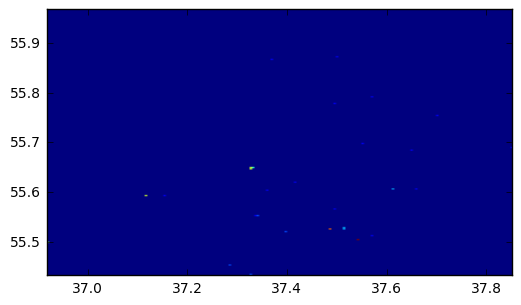

In [24]:
import numpy as np
import matplotlib.pyplot as plt
y= data['lat']
x= data['lon']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
#plt.figure(figsize=(10,5))
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()